# MULTI_ELEMENT_LITHOLOGY MACHINE LEARNING ANALYSIS FOR GOLD PREDICTION

As an exploration geologist working in the mining industry, one of the important preliminary steps is to carry out exploration activities to identify the potential areas that may contain valuable minerals or elements. A common approach is to conduct drilling activities to obtain rock samples, which are then sent to the laboratory for multi-element analysis. The dataset under consideration contains the results of such analyses, consisting of 10 drilled diamond holes and 2020 rock samples, with 37 different elements analyzed, including gold.

The objective of this project is to identify the important elements that are indicative of the presence of gold in the rock samples. By analyzing the data, we aim to identify any patterns or relationships that may exist between the different elements and the presence of gold. This can help in the identification of the specific elements that are important in the analysis of the rock samples and provide insights into the types of minerals or elements present in the rocks.

Additionally, we aim to build a predictive model that can accurately predict the presence of gold in the rock samples based on the results of past historic data. This can help in identifying potential areas that may contain gold, which can be further explored and mined. The model can be trained using the historic data and evaluated using appropriate performance metrics to ensure its accuracy and reliability.

Overall, this project aims to provide valuable insights into the exploration process and improve the efficiency and effectiveness of identifying potential mining areas with the presence of valuable minerals or elements, specifically gold, in the rocks.

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (ConfusionMatrixDisplay,classification_report,confusion_matrix)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
# Reading the column into a Dataframe

df = pd.read_excel('Multi -element analysis sheet for Machine Learning.xlsx')
df.set_index('Sample ID',inplace =True)  # Made the Sample_id the index column

In [3]:
df.head(10)

,Lithology,Au_ppm,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0.01,No,0.8,2.67,2,27,<10,<0.5,14,...,8,50,<1,<8,0.06,<10,803,<10,45,21
DD005002,LAT,0.01,No,<0.2,3.4,2,23,<10,<0.5,10,...,12,68,<1,<8,0.05,<10,1340,<10,40,20
DD005003,LAT,0.01,No,<0.2,5.36,<2,20,10,0.5,11,...,6,77,1,<8,0.05,<10,995,<10,49,18
DD005004,LAT,0.01,No,0.5,3.84,<2,18,<10,0.6,8,...,8,72,<1,<8,0.07,<10,569,<10,119,14
DD005005,SC,0.01,No,<0.2,2.82,<2,13,<10,<0.5,7,...,6,48,<1,<8,0.11,<10,514,<10,74,12
DD005006,SC,0.01,No,<0.2,2.2,<2,<10,12,<0.5,<2,...,<2,34,<1,<8,0.06,<10,427,<10,37,11
DD005007,SC,0.01,No,<0.2,1.99,<2,<10,<10,<0.5,4,...,4,49,<1,<8,0.06,<10,447,<10,44,8
DD005008,AMP,0.01,No,<0.2,2.04,<2,<10,<10,<0.5,4,...,3,32,<1,<8,0.08,<10,357,<10,49,7
DD005009,AMP,0.01,No,<0.2,1.76,<2,<10,<10,<0.5,3,...,3,30,<1,<8,0.07,<10,328,<10,122,6


In [4]:
#Replacing the '<' symbol in the dataframe

df= df.replace('<', '',regex = True)

In [5]:
#Rechecking the dataset 

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2020 entries, DD005001 to DD007177
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lithology  2020 non-null   object 
 1   Au_ppm     2020 non-null   float64
 2   AU_ppm     2020 non-null   object 
 3   Ag_ppm     2020 non-null   object 
 4   Al_pc      2020 non-null   object 
 5   As_ppm     2020 non-null   object 
 6   B_ppm      2020 non-null   object 
 7   Ba_ppm     2020 non-null   object 
 8   Be_ppm     2020 non-null   object 
 9   Bi_ppm     2020 non-null   object 
 10  Ca_pc      2020 non-null   object 
 11  Cd_ppm     2020 non-null   object 
 12  Co_ppm     2020 non-null   object 
 13  Cr_ppm     2020 non-null   object 
 14  Cu_ppm     2020 non-null   object 
 15  Fe_pc      2020 non-null   object 
 16  Ga_ppm     2020 non-null   object 
 17  Hg_ppm2    2020 non-null   object 
 18  K_ppm3     2020 non-null   object 
 19  La_ppm4    2020 non-null   object 
 20  Mg

In [6]:
#Checking for duplicates

df.duplicated().sum()

0

In [7]:
#Checking for missing values
df.isnull().sum()


Lithology    0
Au_ppm       0
AU_ppm       0
Ag_ppm       0
Al_pc        0
As_ppm       0
B_ppm        0
Ba_ppm       0
Be_ppm       0
Bi_ppm       0
Ca_pc        0
Cd_ppm       0
Co_ppm       0
Cr_ppm       0
Cu_ppm       0
Fe_pc        0
Ga_ppm       0
Hg_ppm2      0
K_ppm3       0
La_ppm4      0
Mg_ppm5      0
Mn_ppm6      0
Mo_ppm7      0
Na_ppm8      0
Ni_ppm       0
P_ppm        0
Pb_ppm       0
S_pc         0
Sb_ppm       0
Sc_ppm       0
Sr_ppm       0
Th_ppm       0
Ti_pc        0
Tl_ppm       0
V_ppm        0
W_ppm        0
Zn_ppm       0
Zr_ppm       0
dtype: int64

In [8]:
#Checking the datatypes of each column
df.dtypes

Lithology     object
Au_ppm       float64
AU_ppm        object
Ag_ppm        object
Al_pc         object
As_ppm        object
B_ppm         object
Ba_ppm        object
Be_ppm        object
Bi_ppm        object
Ca_pc         object
Cd_ppm        object
Co_ppm        object
Cr_ppm        object
Cu_ppm        object
Fe_pc         object
Ga_ppm        object
Hg_ppm2       object
K_ppm3        object
La_ppm4       object
Mg_ppm5       object
Mn_ppm6       object
Mo_ppm7       object
Na_ppm8       object
Ni_ppm        object
P_ppm         object
Pb_ppm        object
S_pc          object
Sb_ppm        object
Sc_ppm        object
Sr_ppm        object
Th_ppm        object
Ti_pc         object
Tl_ppm        object
V_ppm         object
W_ppm         object
Zn_ppm        object
Zr_ppm        object
dtype: object

In [9]:
df.head()

,Lithology,Au_ppm,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0.01,No,0.8,2.67,2,27,10,0.5,14,...,8,50,1,8,0.06,10,803,10,45,21
DD005002,LAT,0.01,No,0.2,3.4,2,23,10,0.5,10,...,12,68,1,8,0.05,10,1340,10,40,20
DD005003,LAT,0.01,No,0.2,5.36,2,20,10,0.5,11,...,6,77,1,8,0.05,10,995,10,49,18
DD005004,LAT,0.01,No,0.5,3.84,2,18,10,0.6,8,...,8,72,1,8,0.07,10,569,10,119,14
DD005005,SC,0.01,No,0.2,2.82,2,13,10,0.5,7,...,6,48,1,8,0.11,10,514,10,74,12


In [10]:
#Changing the datatypes to float
df.iloc[:,3:38]= df.iloc[:,3:38].astype(float)


In [11]:
#Checking the datatypes
df.dtypes

Lithology     object
Au_ppm       float64
AU_ppm        object
Ag_ppm        object
Al_pc         object
As_ppm        object
B_ppm         object
Ba_ppm        object
Be_ppm        object
Bi_ppm        object
Ca_pc         object
Cd_ppm        object
Co_ppm        object
Cr_ppm        object
Cu_ppm        object
Fe_pc         object
Ga_ppm        object
Hg_ppm2       object
K_ppm3        object
La_ppm4       object
Mg_ppm5       object
Mn_ppm6       object
Mo_ppm7       object
Na_ppm8       object
Ni_ppm        object
P_ppm         object
Pb_ppm        object
S_pc          object
Sb_ppm        object
Sc_ppm        object
Sr_ppm        object
Th_ppm        object
Ti_pc         object
Tl_ppm        object
V_ppm         object
W_ppm         object
Zn_ppm        object
Zr_ppm        object
dtype: object

In [12]:
#AU_ppm percentage check

df['AU_ppm'].value_counts(normalize =True)

AU_ppm
No     0.933168
Yes    0.066832
Name: proportion, dtype: float64

In [13]:
#Category checking of the AU, based oN lithology 

df.groupby('AU_ppm')['Lithology'].value_counts()

AU_ppm  Lithology
No      AMP          986
        BS           242
        SAP          171
        SZQ          159
        DGS           70
        SC            67
        PG            47
        LAT           42
        VQZ           36
        CS            33
        BMS           32
Yes     AMP           70
        SAP           25
        LAT           11
        BS            10
        SC             8
        SZQ            5
        BMS            2
        DGS            2
        PG             2
Name: count, dtype: int64

In [14]:
#Here i copied the dataset, because would still want to use it for linear regression analysis
df2= df.copy()


In [15]:
#Dropped the AU_ppm column with the the actual value(would use for the regression analysis later)

df = df.drop('Au_ppm',axis =1)

In [16]:
df.head()

,Lithology,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,No,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,...,8.0,50.0,1.0,8.0,0.06,10.0,803.0,10.0,45.0,21.0
DD005002,LAT,No,0.2,3.4,2.0,23.0,10.0,0.5,10.0,0.01,...,12.0,68.0,1.0,8.0,0.05,10.0,1340.0,10.0,40.0,20.0
DD005003,LAT,No,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,...,6.0,77.0,1.0,8.0,0.05,10.0,995.0,10.0,49.0,18.0
DD005004,LAT,No,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,...,8.0,72.0,1.0,8.0,0.07,10.0,569.0,10.0,119.0,14.0
DD005005,SC,No,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,...,6.0,48.0,1.0,8.0,0.11,10.0,514.0,10.0,74.0,12.0


In [17]:
df.columns

Index(['Lithology', 'AU_ppm', 'Ag_ppm', 'Al_pc', 'As_ppm', 'B_ppm', 'Ba_ppm',
       'Be_ppm', 'Bi_ppm', 'Ca_pc', 'Cd_ppm', 'Co_ppm', 'Cr_ppm', 'Cu_ppm',
       'Fe_pc', 'Ga_ppm', 'Hg_ppm2', 'K_ppm3', 'La_ppm4', 'Mg_ppm5', 'Mn_ppm6',
       'Mo_ppm7', 'Na_ppm8', 'Ni_ppm', 'P_ppm', 'Pb_ppm', 'S_pc', 'Sb_ppm',
       'Sc_ppm', 'Sr_ppm', 'Th_ppm', 'Ti_pc', 'Tl_ppm', 'V_ppm', 'W_ppm',
       'Zn_ppm', 'Zr_ppm'],
      dtype='object')

##EXPLORATORY ANALYSIS
CHECK OUT THE DATA DICTIONARY FOR THE ABBREVATION MEANING

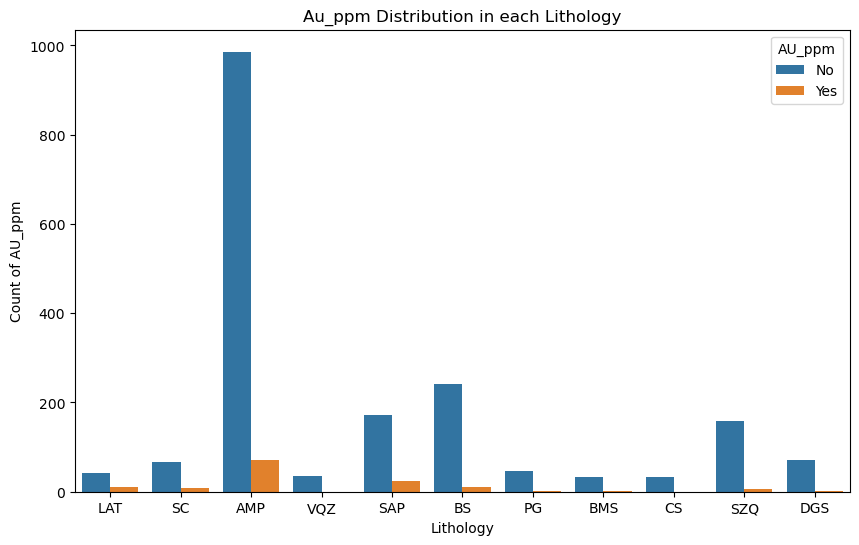

In [18]:
#Showing the distribution of Au_ppm in each lithology

plt.figure(figsize =(10,6))

sns.countplot(x ='Lithology', hue ='AU_ppm', data = df)

plt.xlabel('Lithology')
plt.ylabel('Count of AU_ppm')
plt.title('Au_ppm Distribution in each Lithology')
plt.show()

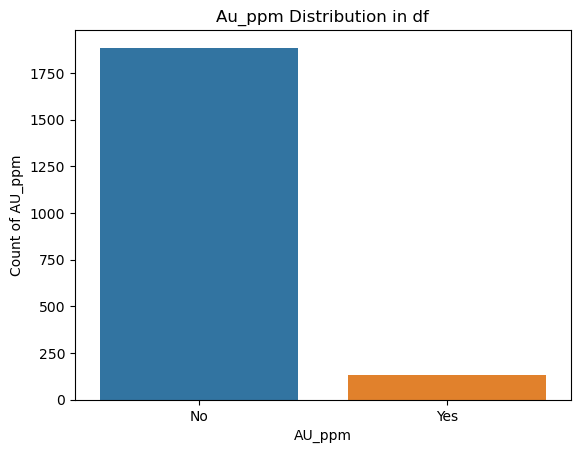

In [19]:
#AU_PPM dataset distribution 

sns.countplot(x ='AU_ppm',data = df)
plt.xlabel('AU_ppm')
plt.ylabel('Count of AU_ppm')
plt.title('Au_ppm Distribution in df')
plt.show()

This is not good news, because it seems that most of our samples does not contain AU. We should drill down a little bit further.
It also shows that  we have an inbalanced dataset, where the majority class is far biggger than the minority class

We knw that the dataset conatains 36 numerical value,it might be useful to see where the values of one of these feature cluster,
so lets make a boxplot to see how the values in 'S_pc and Fe_pc' are distributed, we selected 'S_pc' and Fe_pc which is represented as sulphur and Iron beacuse 'Fools gold' also known as 'Pyrite' is mostly associated with the geology of the area.

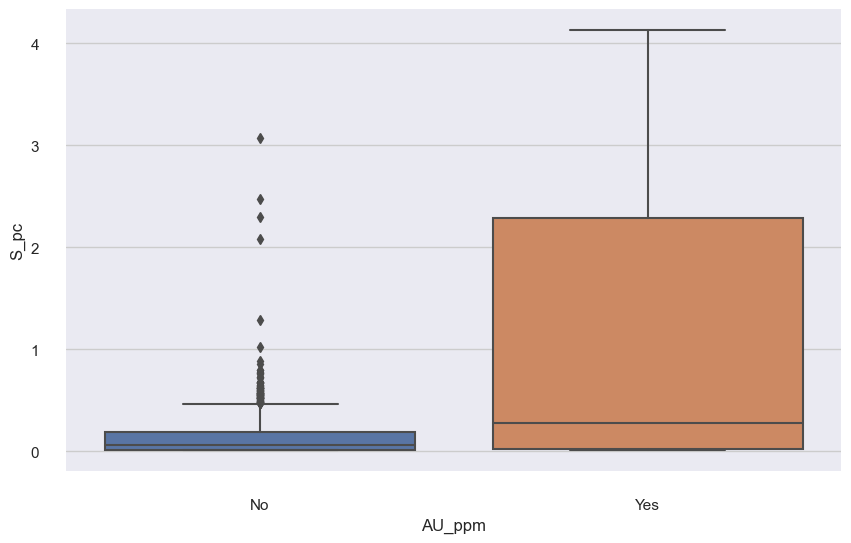

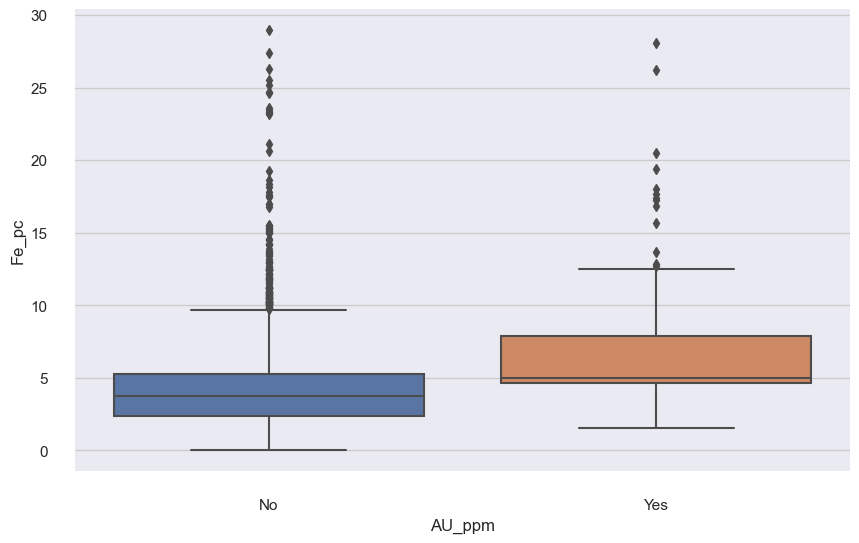

In [20]:
#Creating the Boxplot distribution for the S and Fe elements

for columns in df[['S_pc','Fe_pc']]:
    sns.set()
    fig,ax =plt.subplots()
    sns.set(style='ticks')
    sns.boxplot(x= 'AU_ppm', y =columns, data =df)
    sns.despine(offset =10, trim =True)
    fig.set_size_inches(10,6)

The boxplot is for us to see the quartiles distribution , but to get a clearer picture we wnt to see the exact statistics value

In [21]:
df[['Fe_pc','S_pc']].describe()#.apply("{0:,.0f}".format)  

,Fe_pc,S_pc
count,2020.00,2020.00
unique,821.00,121.00
top,4.16,0.01
freq,10.00,615.00


The mean of each of the element(Fe_ and S_) is gretaer than the median, which means he dataset is right skwewed, would plot a barplot to show it

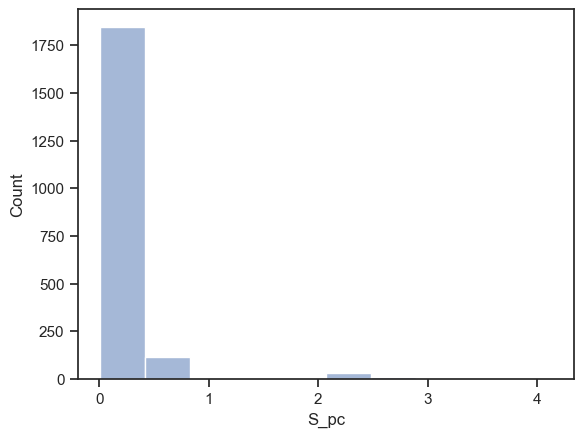

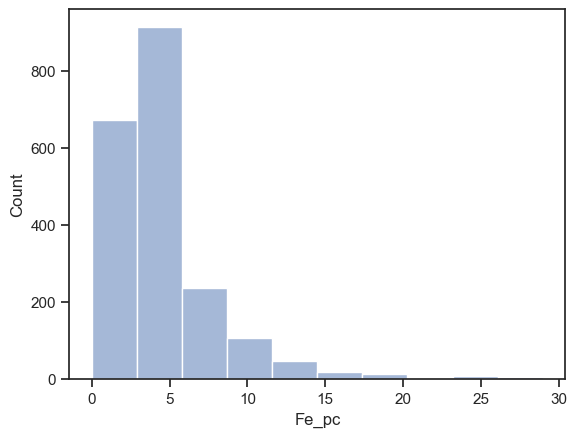

In [22]:
def plot_histogram(data,columns,bins =10):
    for col in columns:
        fig,ax =plt.subplots()
        sns.histplot(data =data, x=col, bins =bins, alpha =0.5)

plot_histogram(data =df,columns=['S_pc','Fe_pc'])

From above we can still see that the data is right_skewed, we have to balance the dataset too

<Axes: >

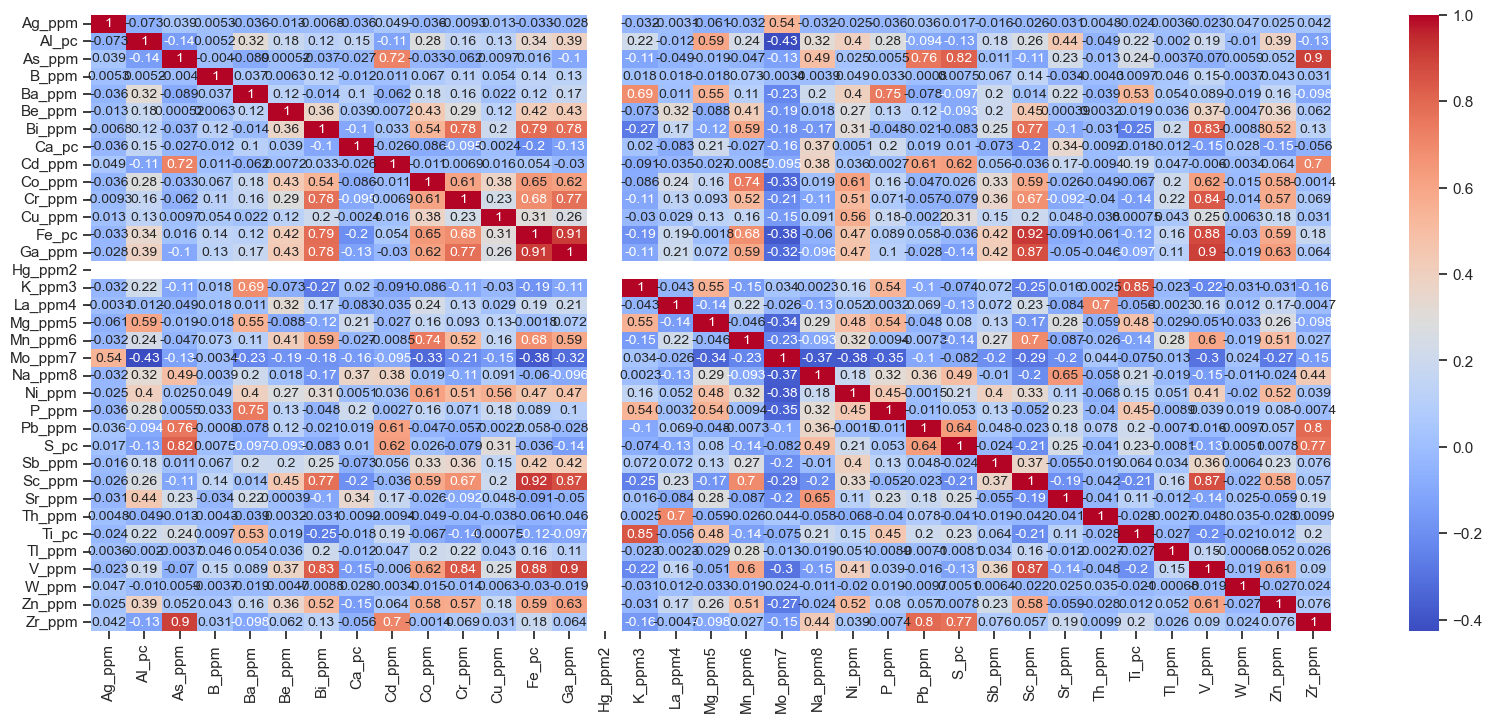

In [23]:
#We need to check for multicollinaerity in the dataset

corr = df.drop(columns =['Lithology','AU_ppm']).corr()
corr.head()
fig,ax= plt.subplots(figsize =(20,8))
sns.heatmap(corr,ax=ax,cmap ='coolwarm',annot = True,annot_kws={'size': 10})

#From here we see that we have a lot of multicollinearity issues, so we need to stay clea of linear models, 
#lets try a tree model instead

LETS START BUIDING OUR MODEL;

In [24]:
df

,Lithology,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,No,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,...,8.0,50.0,1.0,8.0,0.06,10.0,803.0,10.0,45.0,21.0
DD005002,LAT,No,0.2,3.4,2.0,23.0,10.0,0.5,10.0,0.01,...,12.0,68.0,1.0,8.0,0.05,10.0,1340.0,10.0,40.0,20.0
DD005003,LAT,No,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,...,6.0,77.0,1.0,8.0,0.05,10.0,995.0,10.0,49.0,18.0
DD005004,LAT,No,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,...,8.0,72.0,1.0,8.0,0.07,10.0,569.0,10.0,119.0,14.0
DD005005,SC,No,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,...,6.0,48.0,1.0,8.0,0.11,10.0,514.0,10.0,74.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,VQZ,No,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,...,2.0,4.0,30.0,8.0,0.09,10.0,22.0,10.0,33.0,5.0
DD007174,VQZ,No,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,...,2.0,5.0,70.0,8.0,0.11,10.0,29.0,10.0,18.0,5.0
DD007175,CS,No,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,...,2.0,2.0,133.0,8.0,0.06,10.0,17.0,10.0,91.0,5.0


In [25]:
df = df.replace({'AU_ppm':{'Yes':1,'No':0}})

In [26]:
df


,Lithology,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,...,8.0,50.0,1.0,8.0,0.06,10.0,803.0,10.0,45.0,21.0
DD005002,LAT,0,0.2,3.4,2.0,23.0,10.0,0.5,10.0,0.01,...,12.0,68.0,1.0,8.0,0.05,10.0,1340.0,10.0,40.0,20.0
DD005003,LAT,0,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,...,6.0,77.0,1.0,8.0,0.05,10.0,995.0,10.0,49.0,18.0
DD005004,LAT,0,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,...,8.0,72.0,1.0,8.0,0.07,10.0,569.0,10.0,119.0,14.0
DD005005,SC,0,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,...,6.0,48.0,1.0,8.0,0.11,10.0,514.0,10.0,74.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,VQZ,0,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,...,2.0,4.0,30.0,8.0,0.09,10.0,22.0,10.0,33.0,5.0
DD007174,VQZ,0,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,...,2.0,5.0,70.0,8.0,0.11,10.0,29.0,10.0,18.0,5.0
DD007175,CS,0,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,...,2.0,2.0,133.0,8.0,0.06,10.0,17.0,10.0,91.0,5.0


In [27]:
df['AU_ppm'].value_counts()

AU_ppm
0    1885
1     135
Name: count, dtype: int64

In [28]:
#The 'lithology ' column is a categorical data, so im using the dummmies to encode to improve accuracy of the model.

dummies = pd.get_dummies(df.Lithology)
dummies

,AMP,BMS,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
Sample ID,,,,,,,,,,,
DD005001,False,False,False,False,False,True,False,False,False,False,False
DD005002,False,False,False,False,False,True,False,False,False,False,False
DD005003,False,False,False,False,False,True,False,False,False,False,False
DD005004,False,False,False,False,False,True,False,False,False,False,False
DD005005,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
DD007173,False,False,False,False,False,False,False,False,False,False,True
DD007174,False,False,False,False,False,False,False,False,False,False,True
DD007175,False,False,False,True,False,False,False,False,False,False,False


In [29]:
#Merging the dummies variable and the dataframe

merged =pd.concat([df,dummies],axis =1)
merged

,Lithology,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,...,BMS,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,...,False,False,False,False,True,False,False,False,False,False
DD005002,LAT,0,0.2,3.4,2.0,23.0,10.0,0.5,10.0,0.01,...,False,False,False,False,True,False,False,False,False,False
DD005003,LAT,0,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,...,False,False,False,False,True,False,False,False,False,False
DD005004,LAT,0,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,...,False,False,False,False,True,False,False,False,False,False
DD005005,SC,0,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,VQZ,0,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,...,False,False,False,False,False,False,False,False,False,True
DD007174,VQZ,0,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,...,False,False,False,False,False,False,False,False,False,True
DD007175,CS,0,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,...,False,False,True,False,False,False,False,False,False,False


In [30]:
#Dropping the lithology column
df = merged.drop(['Lithology'],axis =1)
df

,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,...,BMS,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,0,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,0.5,...,False,False,False,False,True,False,False,False,False,False
DD005002,0,0.2,3.4,2.0,23.0,10.0,0.5,10.0,0.01,0.5,...,False,False,False,False,True,False,False,False,False,False
DD005003,0,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,0.5,...,False,False,False,False,True,False,False,False,False,False
DD005004,0,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,0.5,...,False,False,False,False,True,False,False,False,False,False
DD005005,0,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,0.5,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,0,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,0.5,...,False,False,False,False,False,False,False,False,False,True
DD007174,0,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,0.5,...,False,False,False,False,False,False,False,False,False,True
DD007175,0,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,0.5,...,False,False,True,False,False,False,False,False,False,False


In [31]:
#Dropping the endoded 'BMS' to avoid dummies bias

df=df.drop(['BMS'],axis =1)
df

,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,...,AMP,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,0,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,0.5,...,False,False,False,False,True,False,False,False,False,False
DD005002,0,0.2,3.4,2.0,23.0,10.0,0.5,10.0,0.01,0.5,...,False,False,False,False,True,False,False,False,False,False
DD005003,0,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,0.5,...,False,False,False,False,True,False,False,False,False,False
DD005004,0,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,0.5,...,False,False,False,False,True,False,False,False,False,False
DD005005,0,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,0.5,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,0,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,0.5,...,False,False,False,False,False,False,False,False,False,True
DD007174,0,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,0.5,...,False,False,False,False,False,False,False,False,False,True
DD007175,0,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,0.5,...,False,False,True,False,False,False,False,False,False,False


In [32]:
df.columns

Index(['AU_ppm', 'Ag_ppm', 'Al_pc', 'As_ppm', 'B_ppm', 'Ba_ppm', 'Be_ppm',
       'Bi_ppm', 'Ca_pc', 'Cd_ppm', 'Co_ppm', 'Cr_ppm', 'Cu_ppm', 'Fe_pc',
       'Ga_ppm', 'Hg_ppm2', 'K_ppm3', 'La_ppm4', 'Mg_ppm5', 'Mn_ppm6',
       'Mo_ppm7', 'Na_ppm8', 'Ni_ppm', 'P_ppm', 'Pb_ppm', 'S_pc', 'Sb_ppm',
       'Sc_ppm', 'Sr_ppm', 'Th_ppm', 'Ti_pc', 'Tl_ppm', 'V_ppm', 'W_ppm',
       'Zn_ppm', 'Zr_ppm', 'AMP', 'BS', 'CS', 'DGS', 'LAT', 'PG', 'SAP', 'SC',
       'SZQ', 'VQZ'],
      dtype='object')

In [33]:
df.rename_axis(None,inplace =True)

In [34]:
#Assigning my X and y variables

target = 'AU_ppm'
X= df.drop(columns='AU_ppm',axis =1)
y =df['AU_ppm']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2020, 45)
y shape: (2020,)


In [35]:
#Splittting my datset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1616, 45)
y_train shape: (1616,)
X_test shape: (404, 45)
y_test shape: (404,)


In [36]:
y_train.head()

DD005261    0
DD005987    0
DD005720    1
DD005240    1
DD006666    0
Name: AU_ppm, dtype: int64

In [37]:
X_train.head()

,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,Co_ppm,...,AMP,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
DD005261,0.2,1.16,2.0,10.0,67.0,0.9,2.0,0.01,0.5,27.0,...,True,False,False,False,False,False,False,False,False,False
DD005987,0.2,5.47,2.0,10.0,70.0,0.5,3.0,0.85,0.5,46.0,...,True,False,False,False,False,False,False,False,False,False
DD005720,1.3,1.25,68.0,17.0,55.0,0.7,2.0,0.52,1.5,16.0,...,True,False,False,False,False,False,False,False,False,False
DD005240,0.8,1.28,68.0,10.0,59.0,0.7,2.0,0.55,1.6,19.0,...,False,False,False,False,False,False,False,True,False,False
DD006666,0.2,1.42,2.0,10.0,84.0,0.5,2.0,0.15,0.5,8.0,...,False,False,False,False,False,False,False,False,False,True


In [38]:
#Changed my X and y to a numpy array

X= np.asarray(X)
y =np.asarray(y)

Remember our data is inbalanced, so i want to get the variables for the Under and over sampled data

In [39]:
#Trying out UNDER_sampling the dataset

under_sampling = RandomUnderSampler(random_state =42)
X_train_under,y_train_under = under_sampling.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(218, 45)


,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,Co_ppm,...,AMP,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
DD006617,0.2,0.98,2.0,10.0,56.0,0.5,2.0,0.25,0.5,9.0,...,False,False,False,False,False,False,False,False,True,False
DD005659,0.2,0.75,2.0,14.0,47.0,0.5,2.0,0.29,0.5,12.0,...,False,True,False,False,False,False,False,False,False,False
DD005599,0.2,3.56,2.0,10.0,117.0,0.5,2.0,0.05,0.5,19.0,...,False,True,False,False,False,False,False,False,False,False
DD006676,0.2,1.2,2.0,10.0,46.0,0.5,2.0,0.2,0.5,7.0,...,False,False,False,True,False,False,False,False,False,False
DD005405,0.2,2.16,2.0,10.0,306.0,0.5,2.0,2.1,0.5,20.0,...,True,False,False,False,False,False,False,False,False,False


In [40]:
#Trying out OVER_sampling the dataset

over_sampling = RandomOverSampler(random_state =42)
X_train_over,y_train_over = over_sampling.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(3014, 45)


,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,Co_ppm,...,AMP,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
0,0.2,1.16,2.0,10.0,67.0,0.9,2.0,0.01,0.5,27.0,...,True,False,False,False,False,False,False,False,False,False
1,0.2,5.47,2.0,10.0,70.0,0.5,3.0,0.85,0.5,46.0,...,True,False,False,False,False,False,False,False,False,False
2,1.3,1.25,68.0,17.0,55.0,0.7,2.0,0.52,1.5,16.0,...,True,False,False,False,False,False,False,False,False,False
3,0.8,1.28,68.0,10.0,59.0,0.7,2.0,0.55,1.6,19.0,...,False,False,False,False,False,False,False,True,False,False
4,0.2,1.42,2.0,10.0,84.0,0.5,2.0,0.15,0.5,8.0,...,False,False,False,False,False,False,False,False,False,True


Getting the baseline accuracy score, to get a perfect idea of the acuracy score we would be working with

In [41]:
accuracy_baseline = y_train.value_counts(normalize = True).max()

In [42]:
accuracy_baseline

0.932549504950495

I needed to evaluate the accuracy of various models on the entire dataset, including the normal dataset, by computing cross-validation scores. The KNN had th highest Cv accuracy

In [43]:
#list of models
models = [LogisticRegression(max_iter =10000), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

In [44]:
# Here i am iteraing over the models, to get the cross-validation scores for 5 folds, and also gering the accuracy scores for
#each of the model
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [45]:
compare_models_cross_validation()

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Cross Validation accuracies for the LogisticRegression(max_iter=10000) = [0.94059406 0.9529703  0.96039604 0.92079208 0.96534653]
Acccuracy score of the  LogisticRegression(max_iter=10000) = 94.8 %
---------------------------------------------------------------
Cross Validation accuracies for the DecisionTreeClassifier() = [0.84158416 0.9529703  0.89851485 0.88366337 0.95049505]
Acccuracy score of the  DecisionTreeClassifier() = 90.54 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.93069307 0.9480198  0.95792079 0.92326733 0.96287129]
Acccuracy score of the  KNeighborsClassifier() = 94.46 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier() = [0.9529703  0.95049505 0.97029703 0.92079208 0.96287129]
Acccuracy score of the  RandomForestClassifier() = 95.15 %
---------------------------------------------------------------


In [46]:
# Here i am iteraing over the models, to get the cross-validation scores for 5 folds, and also getting the accuracy scores for
#each of the model, also getting the Accuracy scores of the Over sampled and Undersampled data.
#Noticed that there was multicollinaerity in my data, so used PCA to rduce dimensionality

from sklearn.decomposition import PCA
logreg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

models = [logreg, tree, forest]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cross-validation scores for each model
for model in models:
    cv_score = cross_val_score(model, X_pca, y, cv=5)
    mean_accuracy = round(np.mean(cv_score)*100, 2)
    print('Cross Validation accuracies for', model.__class__.__name__, '=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    
    # Undersampling
    under_sampling = RandomUnderSampler(random_state=42)
    X_train_under, y_train_under = under_sampling.fit_resample(X_train, y_train)
    model.fit(X_train_under, y_train_under)
    y_pred_under = model.predict(X_test)
    accuracy_under = round(accuracy_score(y_test, y_pred_under), 2)
    print('Accuracy score of', model.__class__.__name__, 'with RandomUnderSampler =', accuracy_under, '%')
  
    
    # Oversampling
    over_sampling = RandomOverSampler(random_state=42)
    X_train_over, y_train_over = over_sampling.fit_resample(X_train, y_train)
    model.fit(X_train_over, y_train_over)
    y_pred_over = model.predict(X_test)
    accuracy_over = round(accuracy_score(y_test, y_pred_over), 2)
    print('Accuracy score of', model.__class__.__name__, 'with RandomOverSampler =', accuracy_over, '%')
   

Cross Validation accuracies for LogisticRegression = [0.94554455 0.94554455 0.96039604 0.88861386 0.96039604]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 94.01 %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of LogisticRegression with RandomUnderSampler = 0.76 %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of LogisticRegression with RandomOverSampler = 0.84 %
Cross Validation accuracies for DecisionTreeClassifier = [0.93069307 0.90594059 0.96287129 0.87623762 0.93069307]
Acccuracy score of the  DecisionTreeClassifier() = 92.13 %
Accuracy score of DecisionTreeClassifier with RandomUnderSampler = 0.7 %
Accuracy score of DecisionTreeClassifier with RandomOverSampler = 0.92 %
Cross Validation accuracies for RandomForestClassifier = [0.95544554 0.9480198  0.97029703 0.91584158 0.96534653]
Acccuracy score of the  RandomForestClassifier() = 95.1 %
Accuracy score of RandomForestClassifier with RandomUnderSampler = 0.79 %
Accuracy score of RandomForestClassifier with RandomOverSampler = 0.96 %


In [47]:
y_train_over.value_counts(normalize=True)

AU_ppm
0    0.5
1    0.5
Name: proportion, dtype: float64

In [48]:
#Here I are standardizing the data then , then using the threee different training dataset


model_reg = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
model_reg.fit(X_train,y_train)

model_under = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
model_under.fit(X_train_under,y_train_under)

model_over = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
model_over.fit(X_train_over,y_train_over)





Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [49]:
#Here we are iterating over the the list of the models created above

model_list = [model_reg, model_under, model_over]
model_names = []
for m in model_list:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)
    model_name = m.__class__.__name__
    model_names.append(model_name)
    print('Training accuracy for', model_name, '=', acc_train)
    print('Test accuracy for', model_name, '=', acc_test)

Training accuracy for Pipeline = 1.0
Test accuracy for Pipeline = 0.9554455445544554
Training accuracy for Pipeline = 0.8446782178217822
Test accuracy for Pipeline = 0.7821782178217822
Training accuracy for Pipeline = 1.0
Test accuracy for Pipeline = 0.9529702970297029


In [50]:
#standardizing the data and trainng a RandonForest model

model_over = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))

In [51]:
#I am estimating the accuracy of the model pipeline using crossvalidation

cv_acc = cross_val_score(model_over,X_train_over,y_train_over,cv =5, n_jobs =-1)

In [52]:
print (cv_acc)

[0.99502488 0.99834163 0.99502488 0.99668325 0.99169435]


In [53]:
#Here im defining the hyperparameters

param = {'randomforestclassifier__n_estimators':range(25,100,25),
          'randomforestclassifier__max_depth':range(10,50,10)}

In [54]:
print(param)

{'randomforestclassifier__n_estimators': range(25, 100, 25), 'randomforestclassifier__max_depth': range(10, 50, 10)}


In [55]:
#Perfomig a gridsearch to prtimize the hyperpparameters
model_over = GridSearchCV(model_over,param_grid=param,cv=5,n_jobs =-1,verbose =1)

In [56]:
print(model)

RandomForestClassifier()


In [57]:
model_over.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [58]:
result = pd.DataFrame(model_over.cv_results_)

In [59]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.237454,0.009628,0.025931,0.007023,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.991708,0.986733,0.995025,0.988391,0.985050,0.989381,0.003578,12
1,0.423727,0.012418,0.024241,0.003547,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.993367,0.996683,0.990050,0.991708,0.986711,0.991704,0.003323,11
2,0.600800,0.007621,0.028395,0.004850,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",0.995025,0.996683,0.993367,0.991708,0.988372,0.993031,0.002859,7
3,0.232728,0.010691,0.017008,0.001691,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.991708,0.993367,0.993367,0.995025,0.990033,0.992700,0.001696,8
4,0.409322,0.007222,0.022994,0.001744,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995025,0.995025,0.995025,0.995025,0.991694,0.994359,0.001332,4
5,0.588830,0.017842,0.033511,0.005732,20,75,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995025,0.995025,0.995025,0.996683,0.991694,0.994690,0.001630,1
6,0.240356,0.015895,0.017353,0.001196,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.991708,0.993367,0.993367,0.993367,0.990033,0.992368,0.001332,9
7,0.437919,0.012148,0.024395,0.003959,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.996683,0.995025,0.995025,0.995025,0.991694,0.994690,0.001630,1
8,0.641039,0.029103,0.037191,0.011734,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",0.993367,0.995025,0.995025,0.996683,0.991694,0.994359,0.001696,4
9,0.231659,0.007947,0.019588,0.003541,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.991708,0.993367,0.993367,0.993367,0.990033,0.992368,0.001332,9


In [60]:
#Checking out the best hyperparameer

model_over.best_params_


{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 75}

In [61]:
y_test.value_counts()

AU_ppm
0    378
1     26
Name: count, dtype: int64

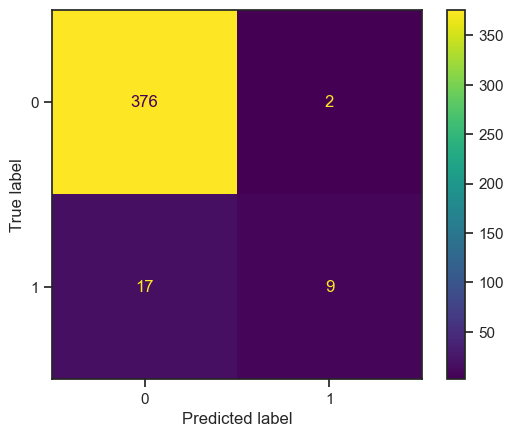

In [62]:
ConfusionMatrixDisplay.from_estimator(model_over,X_test,y_test)

Text(0.5, 1.0, 'Feature Importance')

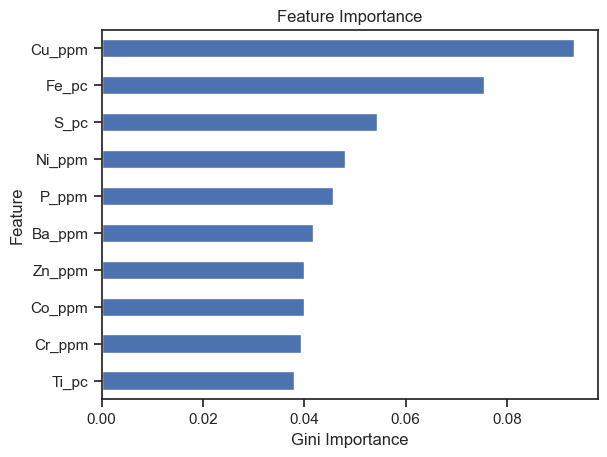

In [63]:
#Plotting an horizontal barchart to see the most important features
#Cu ,Fe,S are the top important features
#This is actually true, because the region where the data was gotten from, Amphibolite is the dominant rock type,
#with chalcoyrite(CuFeS2) and Pyrite(FeS) as the dominant accessory mineral

features =X_train_over.columns
importances = model_over.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
feat_imp =pd.Series(importances, index=features).sort_values()
feat_imp.tail(10).plot(kind ='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

In [64]:
y_pred = model_over.predict(X_test)

In [65]:
y_true =y_test

In [66]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       378
           1       0.82      0.35      0.49        26

    accuracy                           0.95       404
   macro avg       0.89      0.67      0.73       404
weighted avg       0.95      0.95      0.94       404



Text(0.5, 1.0, 'Feature Importance')

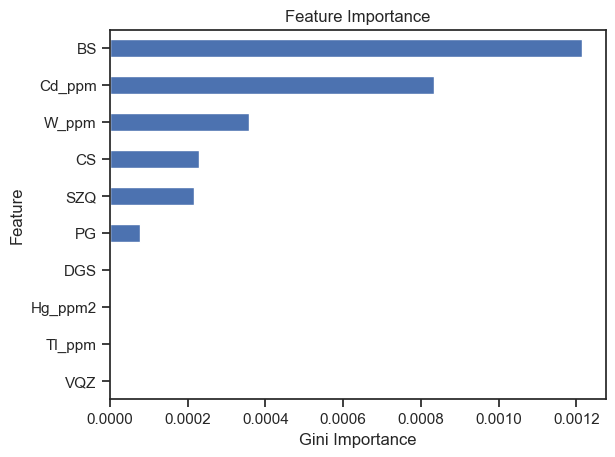

In [67]:
features =X_train_over.columns
importances = model_over.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
feat_imp =pd.Series(importances, index=features).sort_values()
feat_imp.head(10).plot(kind ='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

TRIED USING THE LOGISTIC RERESSIN, BUT THE R2 ERROR DOESNT HAVE AGOOS SCORE. STILL DOING MORE RESEARCH

In [68]:
df2.head()

,Lithology,Au_ppm,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0.01,No,0.8,2.67,2.0,27.0,10.0,0.5,14.0,...,8.0,50.0,1.0,8.0,0.06,10.0,803.0,10.0,45.0,21.0
DD005002,LAT,0.01,No,0.2,3.4,2.0,23.0,10.0,0.5,10.0,...,12.0,68.0,1.0,8.0,0.05,10.0,1340.0,10.0,40.0,20.0
DD005003,LAT,0.01,No,0.2,5.36,2.0,20.0,10.0,0.5,11.0,...,6.0,77.0,1.0,8.0,0.05,10.0,995.0,10.0,49.0,18.0
DD005004,LAT,0.01,No,0.5,3.84,2.0,18.0,10.0,0.6,8.0,...,8.0,72.0,1.0,8.0,0.07,10.0,569.0,10.0,119.0,14.0
DD005005,SC,0.01,No,0.2,2.82,2.0,13.0,10.0,0.5,7.0,...,6.0,48.0,1.0,8.0,0.11,10.0,514.0,10.0,74.0,12.0


In [69]:
df3 = df2.copy()  #Copying the dataset just in case

In [70]:
df2.head()

,Lithology,Au_ppm,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0.01,No,0.8,2.67,2.0,27.0,10.0,0.5,14.0,...,8.0,50.0,1.0,8.0,0.06,10.0,803.0,10.0,45.0,21.0
DD005002,LAT,0.01,No,0.2,3.4,2.0,23.0,10.0,0.5,10.0,...,12.0,68.0,1.0,8.0,0.05,10.0,1340.0,10.0,40.0,20.0
DD005003,LAT,0.01,No,0.2,5.36,2.0,20.0,10.0,0.5,11.0,...,6.0,77.0,1.0,8.0,0.05,10.0,995.0,10.0,49.0,18.0
DD005004,LAT,0.01,No,0.5,3.84,2.0,18.0,10.0,0.6,8.0,...,8.0,72.0,1.0,8.0,0.07,10.0,569.0,10.0,119.0,14.0
DD005005,SC,0.01,No,0.2,2.82,2.0,13.0,10.0,0.5,7.0,...,6.0,48.0,1.0,8.0,0.11,10.0,514.0,10.0,74.0,12.0


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2020 entries, DD005001 to DD007177
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lithology  2020 non-null   object 
 1   Au_ppm     2020 non-null   float64
 2   AU_ppm     2020 non-null   object 
 3   Ag_ppm     2020 non-null   object 
 4   Al_pc      2020 non-null   object 
 5   As_ppm     2020 non-null   object 
 6   B_ppm      2020 non-null   object 
 7   Ba_ppm     2020 non-null   object 
 8   Be_ppm     2020 non-null   object 
 9   Bi_ppm     2020 non-null   object 
 10  Ca_pc      2020 non-null   object 
 11  Cd_ppm     2020 non-null   object 
 12  Co_ppm     2020 non-null   object 
 13  Cr_ppm     2020 non-null   object 
 14  Cu_ppm     2020 non-null   object 
 15  Fe_pc      2020 non-null   object 
 16  Ga_ppm     2020 non-null   object 
 17  Hg_ppm2    2020 non-null   object 
 18  K_ppm3     2020 non-null   object 
 19  La_ppm4    2020 non-null   object 
 20  Mg

In [74]:
df2.rename_axis(None,inplace =True)

In [73]:
#df2 = df2.drp('')

AttributeError: 'DataFrame' object has no attribute 'drp'

In [ ]:
#df2 = df2.drop(columns='Au_ppm')

In [75]:
df2.head()

,Lithology,Au_ppm,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
DD005001,LAT,0.01,No,0.8,2.67,2.0,27.0,10.0,0.5,14.0,...,8.0,50.0,1.0,8.0,0.06,10.0,803.0,10.0,45.0,21.0
DD005002,LAT,0.01,No,0.2,3.4,2.0,23.0,10.0,0.5,10.0,...,12.0,68.0,1.0,8.0,0.05,10.0,1340.0,10.0,40.0,20.0
DD005003,LAT,0.01,No,0.2,5.36,2.0,20.0,10.0,0.5,11.0,...,6.0,77.0,1.0,8.0,0.05,10.0,995.0,10.0,49.0,18.0
DD005004,LAT,0.01,No,0.5,3.84,2.0,18.0,10.0,0.6,8.0,...,8.0,72.0,1.0,8.0,0.07,10.0,569.0,10.0,119.0,14.0
DD005005,SC,0.01,No,0.2,2.82,2.0,13.0,10.0,0.5,7.0,...,6.0,48.0,1.0,8.0,0.11,10.0,514.0,10.0,74.0,12.0


In [76]:
df2 = df2.replace({'AU_ppm':{'Yes':1,'No':0}})

In [77]:
#splittg the data

X =df2.drop(['Au_ppm','Lithology'], axis = 1)
y = df2['Au_ppm']

In [78]:
X.shape

(2020, 36)

In [80]:
y.shape

(2020,)

In [81]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
y_test.shape

(404,)

In [83]:
X_test.shape

(404, 36)

In [84]:
model =LinearRegression()

In [85]:
model.fit(X_train, y_train)

LinearRegression()

In [86]:
#prediction on trainng data

tr_predict = model.predict(X_test)

In [87]:
#R_squared Error
error_score = metrics.r2_score(y_test,tr_predict)
print('R squared error:',error_score)

R squared error: 0.3665136114489326


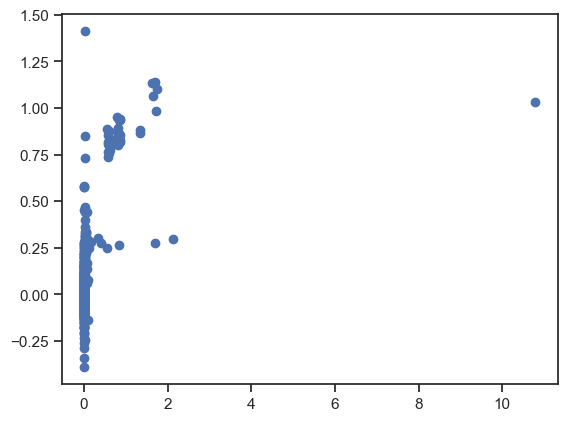

In [88]:
plt.scatter(y_train,model.predict(X_train))
plt.xlabel =('actual Au')
plt.ylabel =('predicted Au')

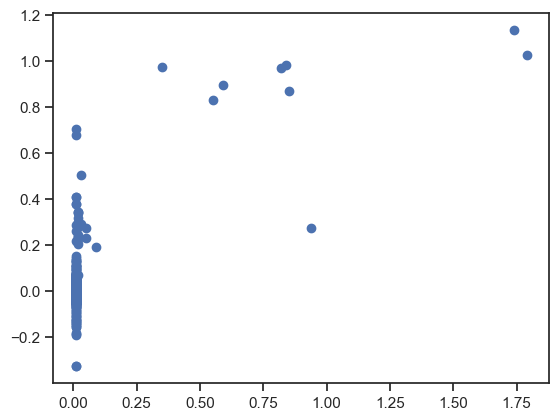

In [89]:
plt.scatter(y_test,model.predict(X_test))
plt.xlabel =('actual Au')
plt.ylabel =('predicted Au')

In [90]:
from sklearn.ensemble import RandomForestRegressor